# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [6]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

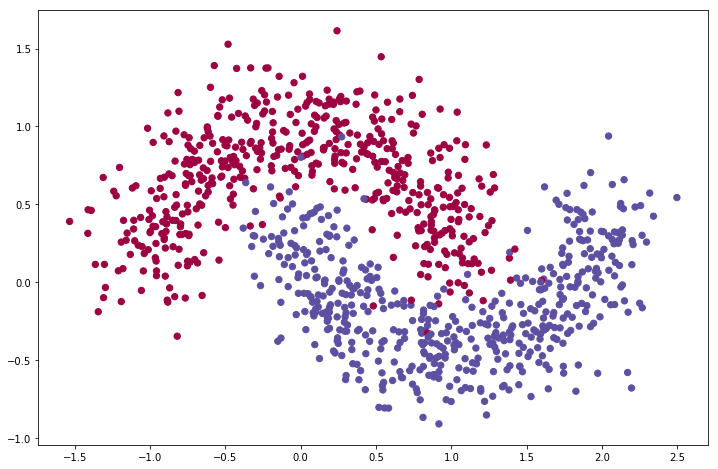

In [7]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [ ]:
model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plot_data(x_train, y_train)